## Import libraries

In [53]:
# TODO deal with non-existing directory (maybe let user add own directory)
# TODO add own direcotry

In [54]:
# To be able to read all files in a directory
import os
# Numpy :)
import numpy as np
# To read images as np arrays
from skimage.io import imread as imread
# To move images
import shutil
# To save np arrays; TODO: might not be nessecary
from PIL import Image
from skimage.color import rgb2gray
# To display images in Jupyter Notebooks
from skimage.io import imshow 

## Selecting the right images

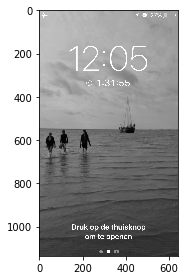

In [55]:
directory = 'iCloud Photos' #TODO maybe add input(directory see polynomial_fit.ipynbpolynomial_fit.ipynb)
filenames = [filename for filename in os.listdir(directory)]

# A perfect example of a picture we would like to recognice is IMG_9984.PNG
A = rgb2gray(imread(f'{directory}/IMG_9984.PNG'))
imshow(A)

### Template matching (normalised cross correlation)
In the next part a first selecting of images will be selected from all by normalized cross correlation, later I thought that the alarm is everywhere on the same place, so that will be an even faster method

In [56]:
# Training pics and test for false positives
train_test = ['0009/true', '0010/true', '0061/true', '9948/false', '0002/false']
for pic_info in train_test:
    num, tag = pic_info.split('/')
    train_pic = rgb2gray(imread(f'{directory}/IMG_{num}.PNG'))
    print(f'''The average result of the template matching is {np.average(match_template(train_pic, A))},
    This is supposed to be a {tag}.
    ''')
print('So for now lets assume a score of 0.92')

The average result of the template matching is 0.9717865632962384,
    This is supposed to be a true.
    
The average result of the template matching is 0.9759078082889194,
    This is supposed to be a true.
    
The average result of the template matching is 0.9770170840913512,
    This is supposed to be a true.
    
The average result of the template matching is 0.9168617466100843,
    This is supposed to be a false.
    
The average result of the template matching is 0.39561150120505484,
    This is supposed to be a false.
    
So for now lets assume a score of 0.92


In [ ]:
for filename in filenames:
    frm = f'{directory}/{filename}'
    img_gray = rgb2gray(imread(frm))
    if img_gray.shape == A.shape and np.average(match_template(img_gray, A)) > 0.92:
        new_p = Image.fromarray(img)
        to = f'/home/meester/Slaap analyse/sleep_analyser/filter_one/{filename}'
        shutil.move(frm,to)
        

### Recognising feature

In [ ]:
# A perfect example of a picture we would like to recognice is IMG_9984.PNG
A = rgb2gray(imread(f'{directory}/IMG_9984.PNG'))
imshow(A[320:360, 210:250])

In [ ]:
for filename in filenames:
    frm = f'{directory}/filter_one/{filename}'
    img_gray = rgb2gray(imread(frm))
    if img_gray.shape == A.shape:
        if np.average(match_template(A[320:360, 210:250], img_gray[320:360, 210:250])) > .99:
            new_p = Image.fromarray(img)
            to = f'/home/meester/Slaap analyse/sleep_analyser/filter_two/{filename}'
            shutil.move(frm,to)
